# Modelo de variables latentes. 

In [1]:
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
import random
import numpy as np
import matplotlib.pyplot as plt
import itertools

from sklearn.naive_bayes import MultinomialNB
from sklearn.externals import joblib
from sklearn.metrics import accuracy_score, confusion_matrix
import tqdm

#Importamos el directorio en donde se encuentran nuestros 
from code_hw import ClassifyImages
from code_hw import SomePlots

Populating the interactive namespace from numpy and matplotlib


Lo primero que haremos, será calcular el vocabulario utilizando los vectores SIFT que fueron proporcionados para el desarrollo de esta tarea.  El primer vocabulario que vamos a construir llevara el nombre de vocabulario_sin_pca el cual vamos a guardar en un pickle.

In [2]:
ClassifyImages.construct_vocabulary_sift("imagedb.zip",100,"vocabulario_sin_pca.pkl",False,"pca_sift.pkl")

Una vez que tenemos el vocuabulario lo que vamos a realizar es obtener la bolsa de caracteristicas mediante el uso de histogramas.

In [4]:
ClassifyImages.generate_bag_of_features("imagedb.zip","vocabulario_sin_pca.pkl","bolsas_caracteristicas_sin_pca.pkl",False,"",False)

100%|██████████| 9033/9033 [01:36<00:00, 93.60it/s]


Ahora lo que vamos a realizar es entrenar diferentes modelos de clasificación. Utilizando las bolsas de caracteristicas que se generaron anteriormente. 

###Multinomial###
===Multinomial Train===
0.707333333333
Confusion matrix-Naive_Bayes, Train


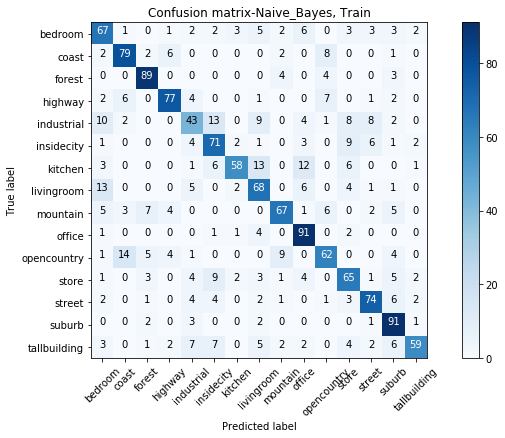

===Multinomial Test===
0.559798994975
Confusion matrix-Naive_Bayes, Test


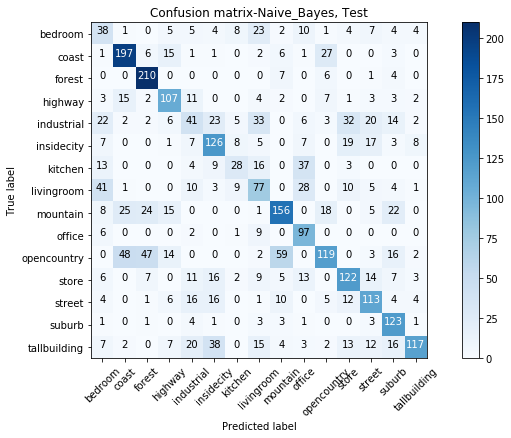

###SGD###
===SGD Train===
0.946666666667
Confusion matrix-Naive_Bayes, Test


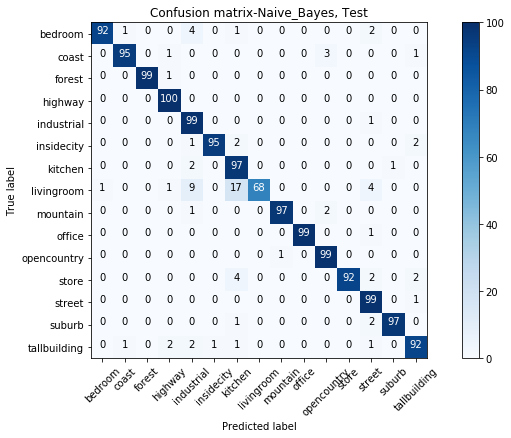

===SGD Test===
0.465326633166
Confusion matrix-Naive_Bayes, Test


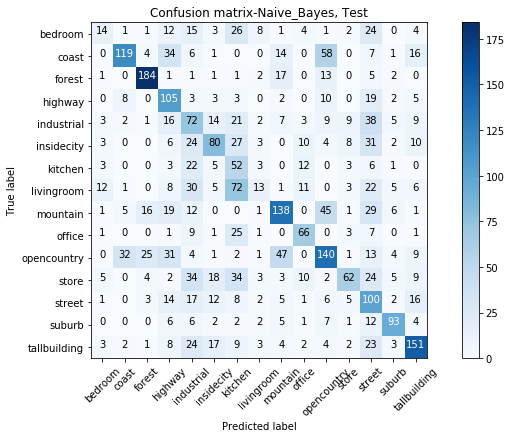

In [6]:
data_bf = joblib.load("bolsas_caracteristicas_sin_pca.pkl", mmap_mode='c')
X_train = data_bf[0]
y_train = data_bf[1]
X_test = data_bf[2]
y_test = data_bf[3]

print "###Multinomial###"
print "===Multinomial Train==="
clf = MultinomialNB()
clf.fit(X_train,y_train)
y_hat = clf.predict(X_train)
#print y_hat
print accuracy_score(y_train,y_hat)
cnf_matrix = confusion_matrix(y_train, y_hat)
np.set_printoptions(precision=2)
SomePlots.plot_confusion_matrix(cm=cnf_matrix, classes=np.unique(y_train),title='Confusion matrix-Naive_Bayes, Train')



print "===Multinomial Test==="
y_hat_test= clf.predict(X_test)
print accuracy_score(y_test,y_hat_test)
cnf_matrix = confusion_matrix(y_test, y_hat_test)
np.set_printoptions(precision=2)
SomePlots.plot_confusion_matrix(cm=cnf_matrix, classes=np.unique(y_train),title='Confusion matrix-Naive_Bayes, Test')




print "###SGD###"
from sklearn.linear_model import SGDClassifier
print "===SGD Train==="
clf_svm = SGDClassifier(loss="hinge", penalty="l2")
clf_svm.fit(X_train, y_train)
y_hat = clf_svm.predict(X_train)
print accuracy_score(y_train,y_hat)
cnf_matrix = confusion_matrix(y_train, y_hat)
np.set_printoptions(precision=2)
SomePlots.plot_confusion_matrix(cm=cnf_matrix, classes=np.unique(y_train),title='Confusion matrix-Naive_Bayes, Test')


print "===SGD Test==="
y_hat2= clf_svm.predict(X_test)
#print y_hat2
print accuracy_score(y_test,y_hat2)
cnf_matrix = confusion_matrix(y_test, y_hat2)
np.set_printoptions(precision=2)
SomePlots.plot_confusion_matrix(cm=cnf_matrix, classes=np.unique(y_train),title='Confusion matrix-Naive_Bayes, Test')



Ahora lo que vamos hacer es aplicar PCA a los vectores SIFT. 

In [4]:
ClassifyImages.pca_apply_sift("imagedb.zip",64,"pca_to_sift.pkl")

===The PCA process has started===
.....
===The PCA process is over===


Ahora lo que vamos hacer es construir el vocabulario pero aplicando PCA a los vectores SIFT.

In [7]:
ClassifyImages.construct_vocabulary_sift("imagedb.zip",100,"vocabulario_con_pca.pkl",True,"pca_to_sift.pkl")

In [9]:
ClassifyImages.generate_bag_of_features("imagedb.zip","vocabulario_con_pca.pkl","bolsas_caracteristicas_con_pca_sift.pkl",True,"pca_to_sift.pkl",False)

  0%|          | 0/9033 [00:00<?, ?it/s]

Load ... pca_sift


100%|██████████| 9033/9033 [02:03<00:00, 40.96it/s]


###Multinomial###
===Multinomial Train===
0.704666666667
Confusion matrix-Naive_Bayes, Train


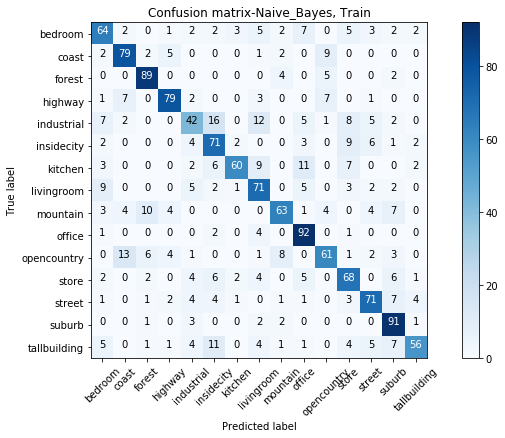

===Multinomial Test===
0.560469011725
Confusion matrix-Naive_Bayes, Test


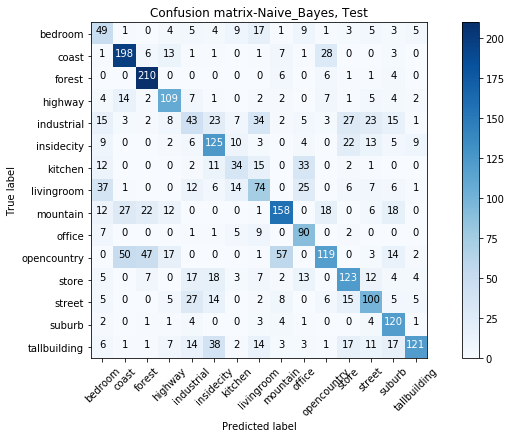

###SGD###
===SGD Train===
0.98
Confusion matrix-Naive_Bayes, Train


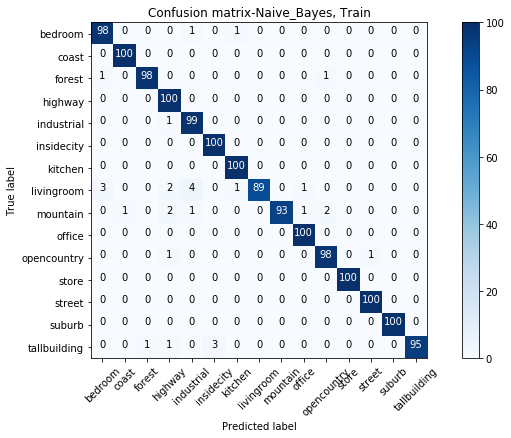

===SGD Test===
0.48040201005
Confusion matrix-Naive_Bayes, Train


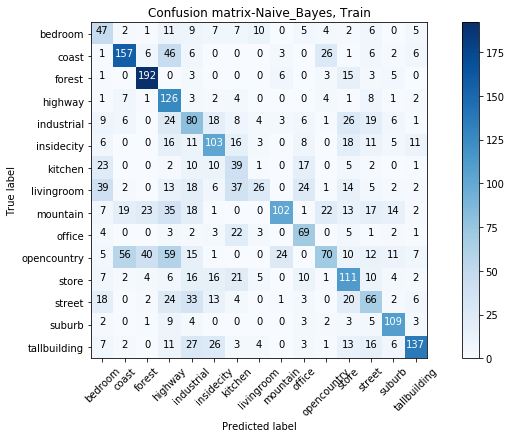

In [7]:
data_bf = joblib.load("bolsas_caracteristicas_con_pca.pkl", mmap_mode='c')
X_train = data_bf[0]
y_train = data_bf[1]
X_test = data_bf[2]
y_test = data_bf[3]

print "###Multinomial###"
print "===Multinomial Train==="
clf = MultinomialNB()
clf.fit(X_train,y_train)
y_hat = clf.predict(X_train)
#print y_hat
print accuracy_score(y_train,y_hat)

cnf_matrix = confusion_matrix(y_train, y_hat)
np.set_printoptions(precision=2)
SomePlots.plot_confusion_matrix(cm=cnf_matrix, classes=np.unique(y_train),title='Confusion matrix-Naive_Bayes, Train')

print "===Multinomial Test==="
y_hat_test= clf.predict(X_test)
print accuracy_score(y_test,y_hat_test)

cnf_matrix = confusion_matrix(y_test, y_hat_test)
np.set_printoptions(precision=2)
SomePlots.plot_confusion_matrix(cm=cnf_matrix, classes=np.unique(y_train),title='Confusion matrix-Naive_Bayes, Test')


print "###SGD###"
from sklearn.linear_model import SGDClassifier
print "===SGD Train==="
clf_svm = SGDClassifier(loss="hinge", penalty="l2")
clf_svm.fit(X_train, y_train)
y_hat = clf_svm.predict(X_train)
print accuracy_score(y_train,y_hat)

cnf_matrix = confusion_matrix(y_train, y_hat)
np.set_printoptions(precision=2)
SomePlots.plot_confusion_matrix(cm=cnf_matrix, classes=np.unique(y_train),title='Confusion matrix-Naive_Bayes, Train')



print "===SGD Test==="
y_hat2= clf_svm.predict(X_test)
#print y_hat2
print accuracy_score(y_test,y_hat2)

cnf_matrix = confusion_matrix(y_test, y_hat2)
np.set_printoptions(precision=2)
SomePlots.plot_confusion_matrix(cm=cnf_matrix, classes=np.unique(y_train),title='Confusion matrix-Naive_Bayes, Train')



Ahora tambien vamos aplicar PCA a los histogramas y veamos el resultado que obtenemos:

In [2]:
ClassifyImages.generate_bag_of_features("imagedb.zip","vocabulario_con_pca.pkl","bolsas_caracteristicas_con_pca_sift_and_hist.pkl",True,"pca_to_sift.pkl",True)

  0%|          | 0/9033 [00:00<?, ?it/s]

Load ... pca_sift


100%|██████████| 9033/9033 [01:56<00:00, 42.69it/s]


Terminado


###SVM###
===SVM Train===
0.993333333333
Confusion matrix-Naive_Bayes, Train


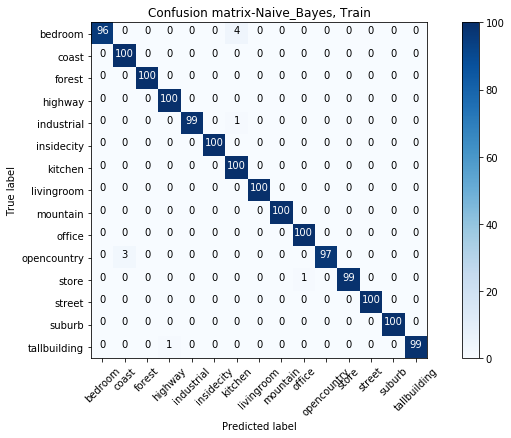

===SVM Test===
0.558123953099
Confusion matrix-Naive_Bayes, Test


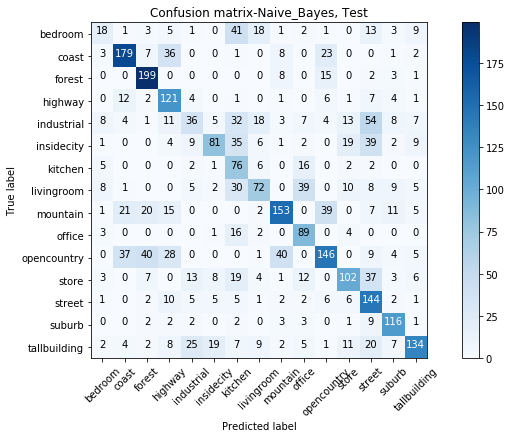

###SGD###
===SGD Train===
0.965333333333
Confusion matrix-Naive_Bayes, Train


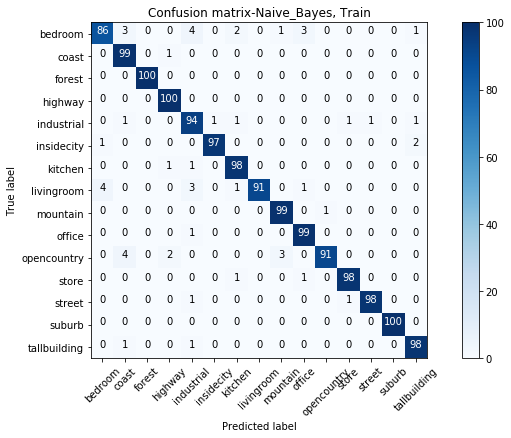

===SGD Test===
0.546733668342
Confusion matrix-Naive_Bayes, Train


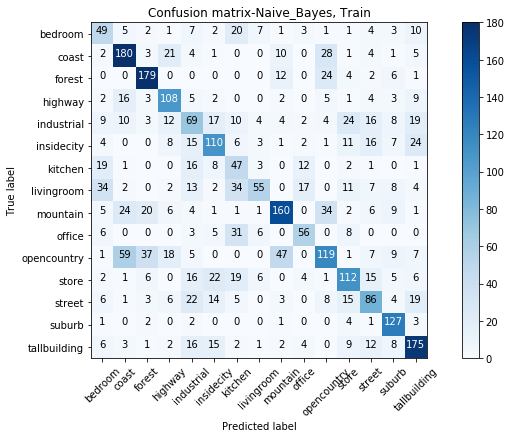

In [8]:
data_bf = joblib.load("bolsas_caracteristicas_con_pca_sift_and_hist.pkl", mmap_mode='c')
X_train = data_bf[0]
y_train = data_bf[1]
X_test = data_bf[2]
y_test = data_bf[3]

print "###SVM###"
print "===SVM Train==="
from sklearn import svm
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_train, y_train) 
y_hat= clf.predict(X_train)
print accuracy_score(y_train,y_hat)

cnf_matrix = confusion_matrix(y_train, y_hat)
np.set_printoptions(precision=2)
SomePlots.plot_confusion_matrix(cm=cnf_matrix, classes=np.unique(y_train),title='Confusion matrix-Naive_Bayes, Train')

print "===SVM Test==="
y_hat_test= clf.predict(X_test)
print accuracy_score(y_test,y_hat_test)

cnf_matrix = confusion_matrix(y_test, y_hat_test)
np.set_printoptions(precision=2)
SomePlots.plot_confusion_matrix(cm=cnf_matrix, classes=np.unique(y_train),title='Confusion matrix-Naive_Bayes, Test')


print "###SGD###"
from sklearn.linear_model import SGDClassifier
print "===SGD Train==="
clf_svm = SGDClassifier(loss="hinge", penalty="l2")
clf_svm.fit(X_train, y_train)
y_hat = clf_svm.predict(X_train)
print accuracy_score(y_train,y_hat)

cnf_matrix = confusion_matrix(y_train, y_hat)
np.set_printoptions(precision=2)
SomePlots.plot_confusion_matrix(cm=cnf_matrix, classes=np.unique(y_train),title='Confusion matrix-Naive_Bayes, Train')



print "===SGD Test==="
y_hat2= clf_svm.predict(X_test)
#print y_hat2
print accuracy_score(y_test,y_hat2)

cnf_matrix = confusion_matrix(y_test, y_hat2)
np.set_printoptions(precision=2)
SomePlots.plot_confusion_matrix(cm=cnf_matrix, classes=np.unique(y_train),title='Confusion matrix-Naive_Bayes, Train')



Considero que algunas ventajas de usar este modelo es que te permite caracterizar las imágenes y poder aplicar de esta manera 
algún algoritmo de clasificación. Considero por otra parte que el costo computacional que se debe realizar es muy alto y por 
otra parte la cantidad de herramientas para obtener características de las imágenes debe de ser variado.

Respecto stop words para este problema estas se definen para problemas de procesamiento de lenguaje natural, donde el 
objetivo es obtener las palabras más comunes y después eliminarlas para que así el algoritmo de aprendizaje puede aprender 
lo que diferente y no aprende como tal lo que es común. Aplicado a imágenes una forma de obtener esto es mediante el uso 
de histogramas que son calculados en base a algún algoritmo de clustering lo que vamos hacer es buscar aquellos elementos 
que son más comunes en las imágenes y eliminarlos para que de manera similar el algoritmo pueda generalizar con 
respecto a lo que es menos común entre las imágenes.

En general aplicando PCA en diferentes niveles se obtuvo un mejor rendimiento pero no fue significativo, observemos que 
en las distintas variantes el ver el rendimiento con el mismo conjunto de entrenamiento es bueno, pero lo que podemos decir 
con respecto al de prueba es que es bajo. Lo que puede estar pasando es que nuestro modelo tiene un sobre ajuste lo cual 
le impide generalizar y es por ello que tenemos un rendimiento bajo en el conjunto de de prueba. Una forma de intentar mejorar 
esto es usando algún otro método para extraer características o inclusive tener una mayor cantidad de imágenes 
que le permita a nuestro algoritmo generalizar.